<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### **Task 2 and Task 3**

**For the "Median value of owner-occupied homes" provide a boxplot**

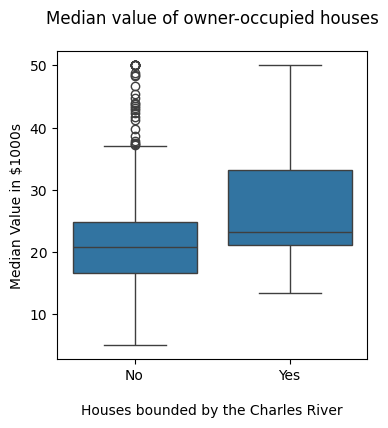

In [5]:
pyplot.figure(figsize=(4,4))
sns.boxplot( x= boston_df['CHAS'], y=boston_df['MEDV'])
pyplot.title('Median value of owner-occupied houses', pad=20)
pyplot.xlabel('Houses bounded by the Charles River', labelpad=15)
pyplot.xticks(ticks=[0,1], labels=['No', 'Yes'])
pyplot.ylabel( 'Median Value in $1000s')

pyplot.show()

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value between houses bounded by Charles river and not ")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value between houses bounded by Charles river and not")


In [6]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

# if the p-value is greater than 0.05 we can assume equality of variance

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [7]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'], boston_df[boston_df['CHAS']==1]['MEDV'], equal_var=False)
# if the p-value is greater than 0.05 we can assume that null hypothesis is true

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusion**= According to the boxplot there is a notorious difference in the median value of houses bounded  by the Charles river compared to other houses located elesewhere. Using the t-student test for unequal variances, we prove that there is a a statistically significant difference between de median value of houses (MEDV) bounded by Charles river and houses located in elsewhere.  Houses bounded by the Charles River are in average  more expensive.

**Provide a  bar plot for the Charles river variable**

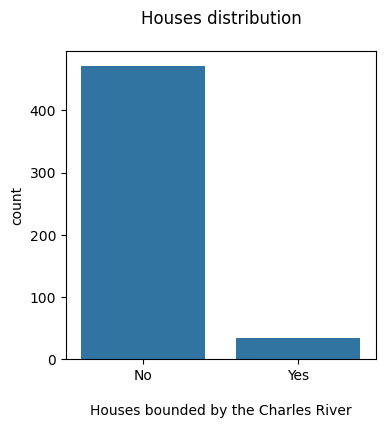

In [8]:
pyplot.figure(figsize=(4,4))
sns.countplot(x=boston_df['CHAS'])
pyplot.title('Houses distribution', pad=20)
pyplot.xlabel('Houses bounded by the Charles River', labelpad=15)
pyplot.xticks(ticks=[0,1], labels=['No', 'Yes'])

pyplot.show()

**Conclusion**= There is a low number of houses bounded by the Charles river

**Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)**

In [9]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUPED'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GROUPED'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUPED'] = '70 years and older'

In [10]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GROUPED
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


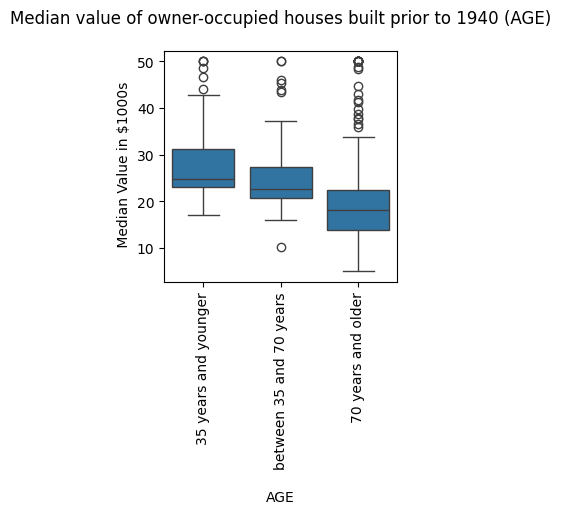

In [11]:
pyplot.figure(figsize=(3,3))
sns.boxplot( x= boston_df['AGE_GROUPED'], y=boston_df['MEDV'], order=['35 years and younger', 'between 35 and 70 years', '70 years and older'])
pyplot.title('Median value of owner-occupied houses built prior to 1940 (AGE)', pad=20)
pyplot.xlabel('AGE', labelpad=15)
pyplot.xticks(rotation=90)
pyplot.ylabel( ' Median Value in $1000s')

pyplot.show()

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ


In [12]:
#Test for equality of variance
scipy.stats.levene(boston_df[boston_df['AGE_GROUPED'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_GROUPED'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['AGE_GROUPED'] == '70 years and older']['MEDV'], 
                   center='mean')
# since the p-value is greater than 0.05, the variance is equal (homocedasticity)

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [13]:
thirtyfive_lower= boston_df[boston_df['AGE_GROUPED'] == '35 years and younger']['MEDV']
thirtyfive_seventy= boston_df[boston_df['AGE_GROUPED'] == 'between 35 and 70 years']['MEDV']
seventy_older= boston_df[boston_df['AGE_GROUPED'] == '70 years and older']['MEDV']

In [14]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion**= There is a statistically significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

**Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?**

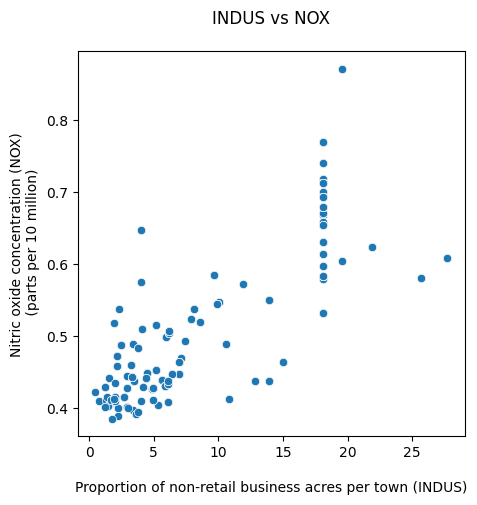

In [15]:
pyplot.figure(figsize=(5,5))
sns.scatterplot( x= boston_df['INDUS'], y=boston_df['NOX'])
pyplot.title('INDUS vs NOX', pad=20)
pyplot.xlabel('Proportion of non-retail business acres per town (INDUS)', labelpad=15)
pyplot.ylabel('Nitric oxide concentration (NOX)\n (parts per 10 million)')
pyplot.show()

State the hypothesis:

*   $H\_0:$ NOX is not correlated with INDUS
*   $H\_1:$ NOX is correlated with INDUS


In [16]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion:** Since the p-value < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between Nitric oxid (NOX) concentration and the proportion of non-retail business acres per town(INDUS)


**Create a histogram for the pupil to teacher ratio variable**

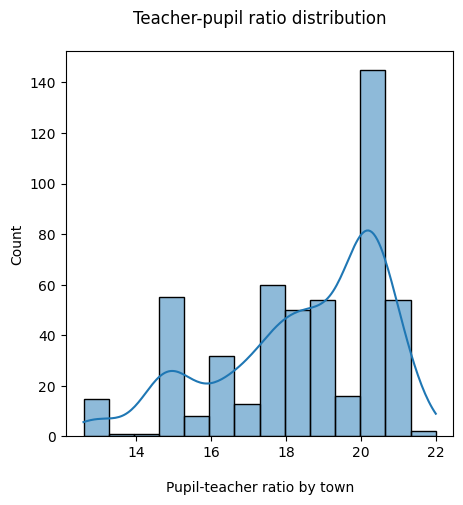

In [17]:
pyplot.figure(figsize=(5,5))
sns.histplot( x= boston_df['PTRATIO'], kde=True)
pyplot.title('Teacher-pupil ratio distribution', pad=20)
pyplot.xlabel('Pupil-teacher ratio by town', labelpad=15)
pyplot.show()

**Conclusion**= The distribution of Pupil-teacher ratio by town is biased to the right. There is a greater proportion of high pupil-teacher ratio by town.

**What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?**

<AxesSubplot:xlabel='DIS', ylabel='MEDV'>

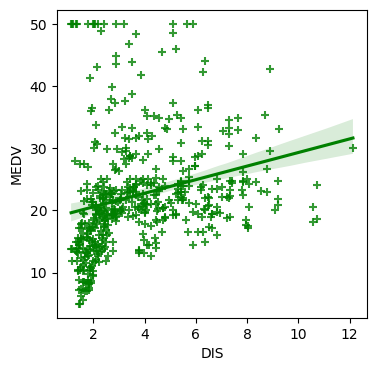

In [27]:
pyplot.figure(figsize=(4,4))
sns.regplot(x='DIS', y='MEDV', data=boston_df, marker='+', color='green')

In [28]:
## X is the input variables (or independent variables)
y = boston_df['MEDV']
## y is the target/dependent variable
X = boston_df['DIS']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        12:18:00   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion**= R-square is 0.062, R will be √0.062, correlation coefficient is 0.248. There is a  weak correlation between the weighted distances to five Boston employment centres (DIS) and the median value of owner-occupied homes (MEDV), then DIS has a low impact in MEDV, but it is statistically significant.